In [58]:
import pandas as pd
from  bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import urllib.request

In [59]:
url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2020'

In [60]:
r_data = urllib.request.urlopen(url)

In [61]:
html_data = r_data.read().decode('utf-8')
html_data = BeautifulSoup(html_data, 'html')

In [62]:
table = html_data.find('table',{'class':'t-chart'})
table_rows = table.find_all('tr')

In [63]:
def table_data():
    table = html_data.find('table',{'class':'t-chart'})
    table_rows = table.find_all('tr')
    list = []
    col = ['date','1mo','2mo','3mo','6mo','1yr','2yr','3yr','5yr','7yr','10yr','20yr','30yr']
    for tr in table_rows:
        td = tr.find_all('td')
        row = [i.text for i in td]
        list.append(row)
    df = pd.DataFrame(list,columns=col)
    df['date'] = df['date'].astype('datetime64[ns]')
    df = df.drop(0)
    for i in df:
        if df[i].dtypes == 'object':
            df[i] = df[i].astype('float')
    return df

In [64]:
def plot_curve():
    #x = datetime.datetime.today()
    #x = str(x.date())
    df = table_data()
    y = str(df['date'][len(df)])
    df2 = df.drop(columns='date')
    data = df2.iloc[len(df2)-1]
    plot = data.plot()
    plot.legend(['Yeild Curve as of: ' + y ])
    plt.grid(True)
    plt.yscale('linear')
    plt.gca()
    plt.show()

In [71]:
df = table_data()

In [73]:
df.head()

,date,1mo,2mo,3mo,6mo,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
1,2020-01-02,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
2,2020-01-03,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
3,2020-01-06,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
4,2020-01-07,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
5,2020-01-08,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35


In [74]:
df.describe()

,1mo,2mo,3mo,6mo,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.116349,1.113333,1.087937,1.082381,1.053333,1.067937,1.080476,1.132540,1.266349,1.353175,1.689524,1.861270
std,0.634780,0.636827,0.642144,0.628441,0.577240,0.504640,0.475494,0.451535,0.416325,0.415280,0.382894,0.364194
min,0.000000,0.000000,0.000000,0.020000,0.110000,0.230000,0.280000,0.370000,0.510000,0.540000,0.870000,0.990000
25%,0.495000,0.470000,0.375000,0.390000,0.390000,0.500000,0.580000,0.660000,0.855000,0.930000,1.345000,1.560000
50%,1.530000,1.550000,1.540000,1.550000,1.460000,1.370000,1.350000,1.370000,1.450000,1.540000,1.840000,2.000000
75%,1.560000,1.570000,1.570000,1.560000,1.530000,1.470000,1.465000,1.490000,1.590000,1.680000,1.985000,2.140000
max,1.610000,1.610000,1.590000,1.580000,1.560000,1.580000,1.610000,1.670000,1.790000,1.880000,2.210000,2.380000


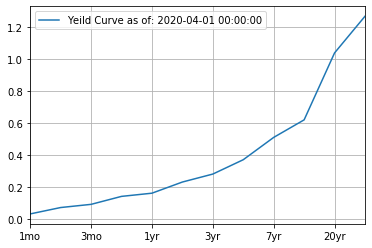

In [65]:
plot_curve()

In [66]:
def plot_tennor(x):
    '''
    possible values for x:
    '1mo','2mo','3mo','6mo','1yr','2yr','3yr','5yr','7yr','10yr','20yr','30yr'
    '''
    df = table_data()
    y = str(df['date'][len(df)])
    df2 = df.drop(columns='date')
    data = df2[x]
    plot = data.plot()
    plot.legend(['Chart for ' + x + y ])
    plt.grid(True)
    plt.yscale('linear')
    plt.gca()
    plt.show()

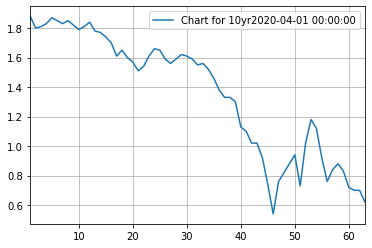

In [67]:
plot_tennor('10yr')

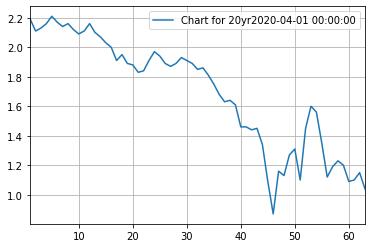

In [69]:
plot_tennor('20yr')